In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
for fn in uploaded.keys():
    df = pd.read_csv(fn)
    print("CSV loaded:", fn)
    display(df.head())


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("heart_dataset.csv")
df.head()


,Date,HRV,HR,BreathingRate,EDA,SkinTemp,Steps,ActiveMinutes,SleepHours,SleepInterruptions,StressScore
0,2024-07-08,46.695183,83.754812,14.932565079314609,0.721788,36.517963,5708.236029,33.602872,6.072437,3,51.391661
1,2024-10-02,55.311784,75.813609,14.527385138227336,0.628355,36.347014,-5980.582410,44.446870,7.055859,2,39.507670
2,2024-10-21,59.911140,67.913389,13.136423805312088,0.716865,37.077723,8027.368700,45.019123,6.519541,2,38.215625
3,2024-12-06,58.478861,NaN,14.261741032181614,0.560083,36.561431,6728.723591,58.075806,7.792781,0,NaN
4,2024-09-23,63.230705,72.415408,12.386065596796355,0.389026,36.583637,8542.773087,80.487413,8.198774,1,23.069130


In [17]:
#Remove duplicates
df.drop_duplicates(inplace=True)


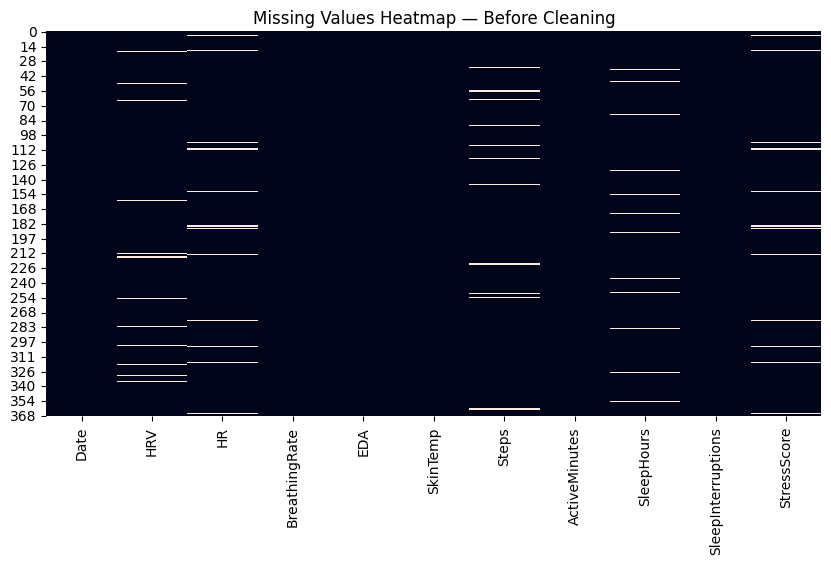

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap — Before Cleaning")
plt.show()


In [19]:
#Fix timestamp disorder

df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
df.sort_values("Date", inplace=True)
df.reset_index(drop=True, inplace=True)

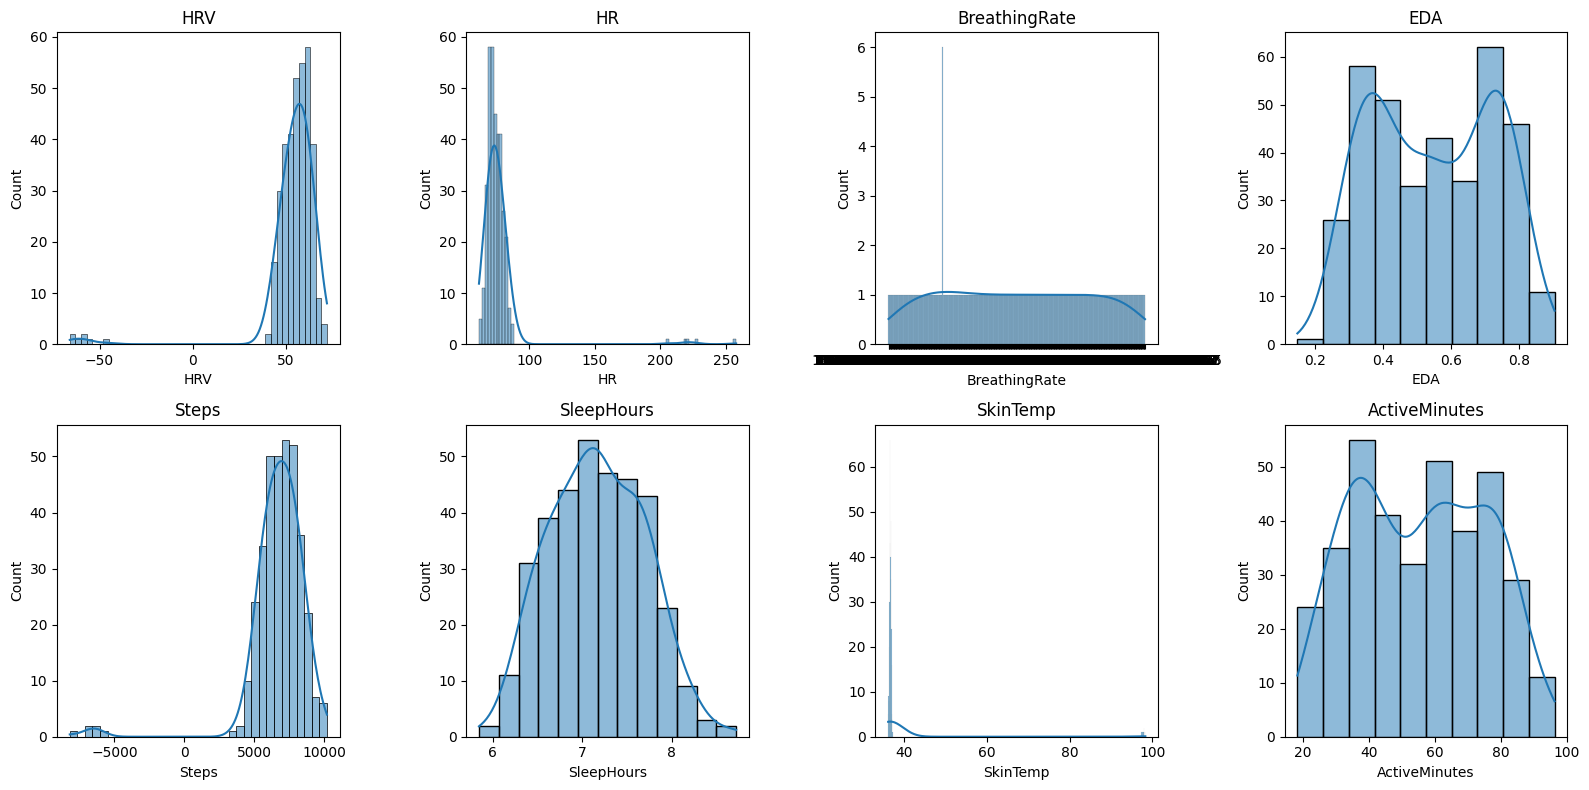

In [20]:
#Distribution comparison — before vs after cleaning
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
columns = ["HRV","HR","BreathingRate","EDA","Steps","SleepHours","SkinTemp","ActiveMinutes"]

for ax, col in zip(axes.flatten(), columns):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()


In [21]:
#Convert mixed types to numeric
df["BreathingRate"] = pd.to_numeric(df["BreathingRate"], errors="coerce")


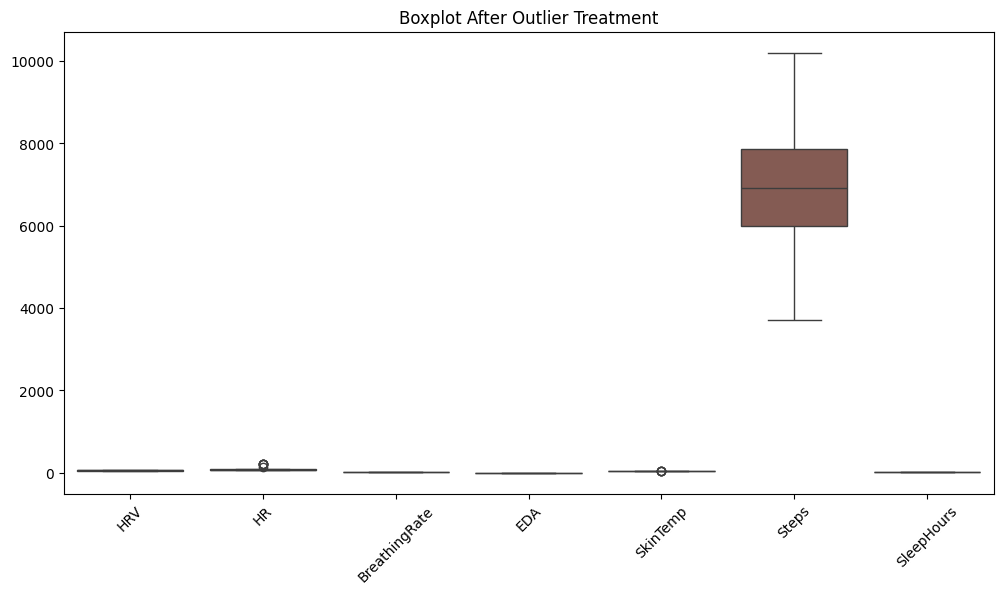

In [26]:
#Outlier visualization (boxplots)
plt.figure(figsize=(12,6))
sns.boxplot(data=df[["HRV","HR","BreathingRate","EDA","SkinTemp","Steps","SleepHours"]])
plt.title("Boxplot After Outlier Treatment")
plt.xticks(rotation=45)
plt.show()

In [22]:
#Convert Fahrenheit temperature → Celsius
df.loc[df["SkinTemp"] > 45, "SkinTemp"] = (df["SkinTemp"] - 32) * 5/9


In [23]:
#Fix negative values (HRV & Steps)
df["HRV"] = df["HRV"].abs()
df["Steps"] = df["Steps"].abs()


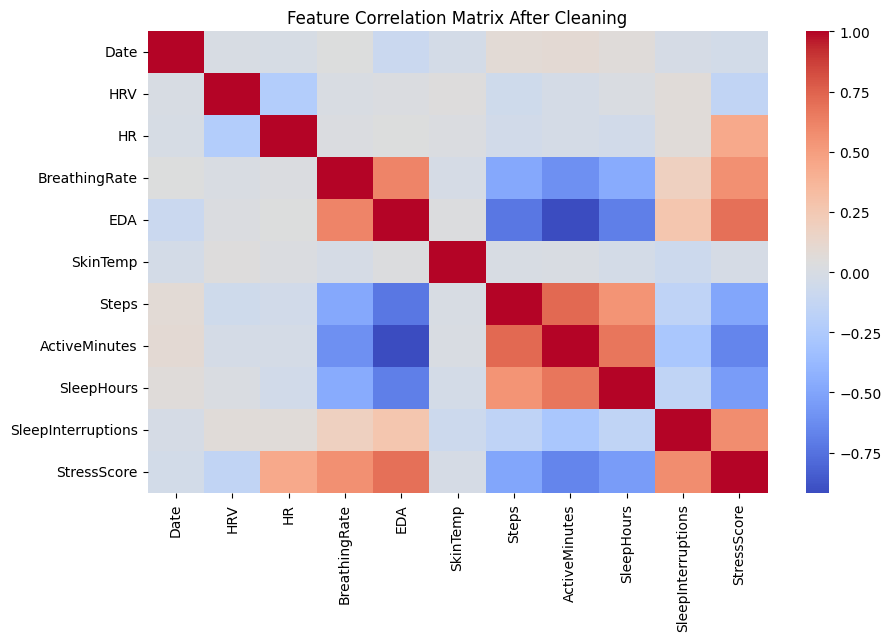

In [27]:
#Correlation heatmap (to show cleaned dataset quality)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Matrix After Cleaning")
plt.show()

In [24]:
#Handle missing values (interpolation)
df.interpolate(method="linear", inplace=True)
df.fillna(method="bfill", inplace=True)
df.fillna(method="ffill", inplace=True)


/tmp/ipython-input-680652078.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)
/tmp/ipython-input-680652078.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


In [25]:
#Remove impossible physiological values

df["HR"] = df["HR"].clip(40, 200)
df["BreathingRate"] = df["BreathingRate"].clip(8, 35)
df["EDA"] = df["EDA"].clip(0.2, 1.5)
df["SkinTemp"] = df["SkinTemp"].clip(35.0, 38.5)
df["SleepHours"] = df["SleepHours"].clip(2, 12)
df["SleepInterruptions"] = df["SleepInterruptions"].clip(0, 8)
df["ActiveMinutes"] = df["ActiveMinutes"].clip(0, 180)
df["Steps"] = df["Steps"].clip(0, 30000)


In [ ]:
df.to_csv("cleaned_dataset.csv", index=False)